# Linear regression theory

#### 1. What is regression?
Regression is a type of machine learning algorithm that predicts numeric values using one or more variables.

#### 2. What is linear regression?
Linear regression is a statistical technique used to model the relationship between a scalar response and one or more explanatory variables.

The linear regression takes the following expressions: $$\textbf{y} \approx \bar{\textbf{y}} = \textbf{X}\textbf{w} + b$$

The term $\textbf{w}$ always has the degree 1, so this equation is similar to the line equation with respect to $\textbf{w}$, so we called the model Linear Regression.

We have some notations here:
- $\textbf{y}$ represents the **actual value** of the predicted variable.
- $\bar{\textbf{y}}$ represents the **predicted value** the predicted variable of the model.
- $\textbf{X}$ represents the explanatory variables.
- $\textbf{w}$ represents the weights or the coefficients of the linear regression.
- $b$ represents the bias of the linear regression.

To get more clearly defined, if $\textbf{X} = [X_1, X_2, \cdots, X_n]$ and $\textbf{w} = [w_1, w_2, \cdots, w_n]^{\mathsf{T}}$, then the above equation can be rewritten as $$\textbf{y} \approx \bar{\textbf{y}} = w_1X_1 + w_2X_2 + \cdots w_nX_n + b$$

In some documents, they define $\textbf{X} = [1, X_1, X_2, \cdots, X_n]$ and $\textbf{w} = [w_0, w_1, w_2, \cdots, w_n]^{\mathsf{T}}$. The equation changes: $$\textbf{y} \approx \bar{\textbf{y}} = w_1X_1 + w_2X_2 + \cdots w_nX_n + w_0 = \textbf{X}\textbf{w}$$

#### 3. How do we find the coefficents in the model?
Our goal is to find the coefficents $\textbf{w}$ so that $\bar{\textbf{y}}$ is "equal to" $\textbf{y}$. In another words, $\textbf{y} - \bar{\textbf{y}}$ is as close to $\textbf{0}$ as possible. 

This means $\textbf{y} - \textbf{X}\textbf{w} \approx \textbf{0}$, or $(\textbf{y} - \textbf{X}\textbf{w})^2 \approx \textbf{0}$. In real application, we just need to find the minimum of $(\textbf{y} - \textbf{X}\textbf{w})^2$.

In Linear Regression, we find the coefficents vector $\textbf{w}^*$ so that $\dfrac{1}{2}(\textbf{y} - \textbf{X}\textbf{w}^*)^2$ get minimum. The reason we add $\dfrac{1}{2}$ to the equation is to clear out the coefficient 2 in the equation. 

Differentiate 2 sides of the above equation and set the differentiate to $\textbf{0}$, we have ${\textbf{X}}^{\mathsf{T}}(\textbf{y} - \textbf{X}\textbf{w}^*) = \textbf{0}$. Therefore, $\textbf{w}^* = ({\textbf{X}}^{\mathsf{T}}\textbf{X})^{-1}{\textbf{X}}^{\mathsf{T}}\textbf{y}$.

This is the equation being used in `sklearn.linear_model.LinearRegression()` api. We will use this, combine with some apis in `sklearn` and some libraries like `numpy`, `pandas` and `matplotlib` to do some examples about Linear Regression.

#### 4. Sounds great, but how do we know that model is perfect?
Well, I have to say that there is no model true. Some models are useful in some ways, and we will cover this in the future.

But for now, if we use Linear Regression, we can get some **metrics** to calculate how good the model is:
- **Mean Squared Error (MSE)**: This is one of the popular metrics used in regression tasks. It calculates the Euclidean distance between the absolute value $\textbf{y}$ and the predicted value $\bar{\textbf{y}}$: $\text{MSE}(\textbf{y}, \bar{\textbf{y}}) = \displaystyle \sum_{i = 1}^{n}(\textbf{y}_i - \bar{\textbf{y}}_i)^2$.
- **Root Mean Squared Error (RMSE)**: Another common metric used in regression tasks is called Root Mean Squared Error (RMSE). We simply take the square root of MSE to obtain RMSE: $\text{RMSE}(\textbf{y}, \bar{\textbf{y}}) = \sqrt{\text{MSE}(\textbf{y}, \bar{\textbf{y}})}$.
- **Mean Absolute Error (MAE)**: Similar to MSE, but instead of using Euclidean distane, Mean Absolute Error (MAE) calculates the Manhattan distance between the absolute value $\textbf{y}$ and the predicted value $\bar{\textbf{y}}$: $\text{MAE}(\textbf{y}, \bar{\textbf{y}}) = \displaystyle \sum_{i = 1}^{n}|\textbf{y}_i - \bar{\textbf{y}}_i|$.

There're also metrics for specific tasks that I can not get more details here. If you interest, I will try to update this notebook to include these metrics.

### Now that we get some basics of Linear Regression, let's get some hands dirty, shall we?

# Let's get some hands dirty!

## First example

Before we get started to examples, we need to call some libraries and apis for later usages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

We read the dataset using pandas. This dataset has 2 columns, SAT score `SAT` and GPA score `GPA`. We will use the Linear Regression to see how SAT score affect the GPA score.

In [2]:
sat_gpa_df = pd.read_csv("../datasets/sat_gpa.csv")
sat_gpa_df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


We will visualize the data to see the correlation.

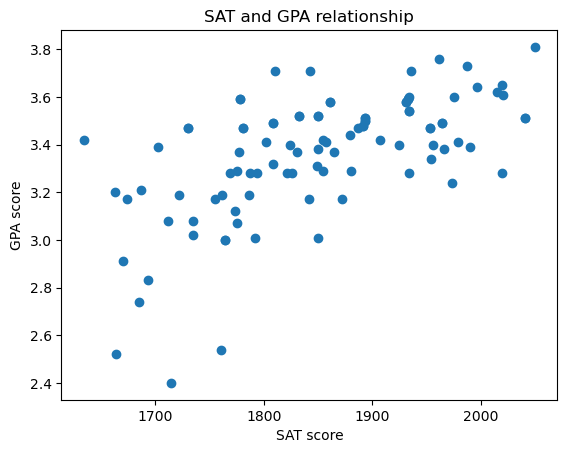

In [3]:
plt.scatter(sat_gpa_df['SAT'], sat_gpa_df['GPA'])
plt.xlabel('SAT score')
plt.ylabel('GPA score')
plt.title('SAT and GPA relationship')
plt.show()

Let's fit a Linear Regression model for the task. Now, since we do this in a Machine Learning fashion, we need to do some steps before fitting the model.

First, we need to define which is the regressor variable $\textbf{X}$ and which is the predicting variable $\textbf{y}$. In this case, $\textbf{X}$ is referred to the 'SAT' column, and $\textbf{y}$ is referred to the `GPA` column.

In [4]:
X = sat_gpa_df.drop(columns='GPA') # You can do X = sat_gpa_df['SAT'] instead, but this is a good practice to do this.
y = sat_gpa_df['GPA']

Next, we need to split the dataset into 2 subsets, a training a subset and a testing subset. We will train the model on the training set, and use the testing set to see the result. We split the 20% of the dataset to the testing. The remaining is used for training. We do that by using `train_test_split()` function.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

The next step is to create an instance of the model. In this case, we call the `LinearRegression()` api from `scikit-learn` to create an instance of Linear Regression model. After that, we will fit this model, and use the model to predict the outcome from the X_test.

In [6]:
linear_regression = LinearRegression() # We call an instance first
linear_regression.fit(X_train, y_train) # Then we fit the model
y_pred = linear_regression.predict(X_test) # Finally, we predict the outcome of X_test and name it y_test

Now, we need something to compare the results. In Linear Regression, we can get the coefficients and the intercept of the model, then plot the results as below.

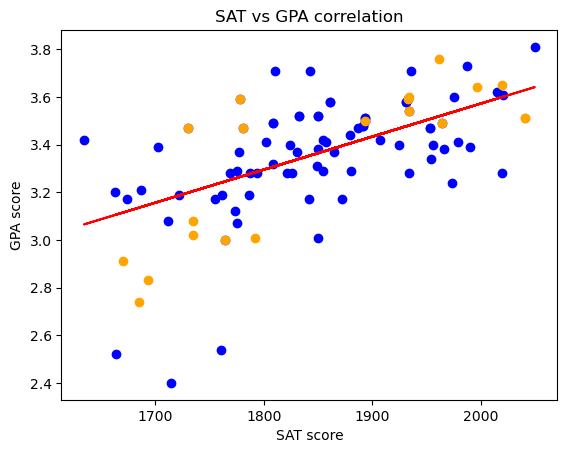

In [7]:
def plot_model_use_coeffs_intercept(model, X_train, y_train, X_test, y_test, xlabel, ylabel, title):
    coeffs = model.coef_
    intercept = model.intercept_
    plt.scatter(X_train, y_train, color='blue')
    plt.scatter(X_test, y_test, color='orange')
    plt.plot(X_train, coeffs * X_train + intercept, color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

plot_model_use_coeffs_intercept(linear_regression, X_train, y_train, X_test, y_test,
                                xlabel='SAT score', ylabel='GPA score', title="SAT vs GPA correlation")

Hmm, looks like this line is not fitted pretty well. We will encounter this in the future. For now, we just need to know how we can evaluate the result.

Another way to visualize the result is visualize the actual vs predicted values in a same graph as below.

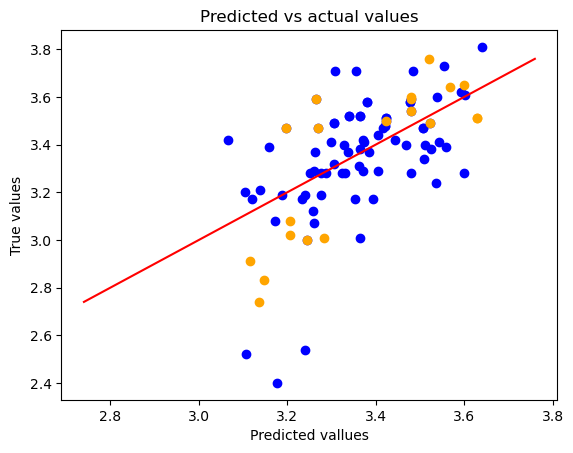

In [8]:
def plot_model_use_pred_and_actual_values(y_train, y_train_pred, y_test, y_test_pred,
                                          xlabel="Predicted vallues", ylabel="True values", title="Predicted vs actual values"):
    plt.scatter(y_train_pred, y_train, color='blue')
    plt.scatter(y_test_pred, y_test, color='orange')
    plt.plot([min(min(y_test_pred), min(y_test)), max(max(y_test_pred), max(y_test))], 
            [min(min(y_test_pred), min(y_test)), max(max(y_test_pred), max(y_test))], color='red') # 45-degree line
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

y_train_pred = linear_regression.predict(X_train)
plot_model_use_pred_and_actual_values(y_train, y_train_pred, y_test, y_pred)

This is not a good model since the prediction values and the actual values are not close enough to the line.

We can also calculate some metrics we have mentioned at the begginning of this notebook. We will calculate MSE, MAE and RMSE using  `mean_squared_error()`, `mean_absolute_error()`, `root_mean_squared_error()` function, respectively.

In [9]:
print('The MSE of the model is: ', mean_squared_error(y_test, y_pred))
print('The MAE of the model is: ', mean_absolute_error(y_test, y_pred))
print('The RMSE of the model is: ', root_mean_squared_error(y_test, y_pred))

The MSE of the model is:  0.04175152010480845
The MAE of the model is:  0.17717074488908163
The RMSE of the model is:  0.2043318871463983


Now, you may ask, **CAN WE DO IT BETTER?** The answer is **YES**, probably. Let's see if we could make the model perform better.

If you look closely to the `SAT` column, you can see that the range of the values in that column are really bigger than the range of the values in the `GPA` column. This can harm your model, make your model perform poorly. So, to solve this problem, what we can do is to perform a **Feature Scaling**, brings the feature to the smaller ranges.

To do this, we need to import and use `sklearn.preprocessing`. We will demonstrate 3 methods for Feature Scaling:
- `sklearn.preprocessing.FunctionTransformer()`: this will use a function (in our case, we use `np.log10`) to scale the values.
- `sklearn.preprocessing.Normalizer()`: this will scale the feature value range to standard normal distribution $\mathcal{N}(0, 1)$.
- `sklearn.preprocessing.MinMaxScaler()`: this will scale the feature value range to the range $[0, 1]$ using the formula
```
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```

In [10]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler

We first need to create instance for each transformation.

In [11]:
transformations = list()
transformations.append(FunctionTransformer(func=np.log10))
transformations.append(StandardScaler())
transformations.append(MinMaxScaler())

Now, we will transform the feature $\textbf{X}$, using all transformations we have already defined above.

In [12]:
X_train_transformed = list()
X_test_transformed = list()
for transformation in transformations:
    X_train_transformed.append(transformation.fit_transform(X_train))
    X_test_transformed.append(transformation.transform(X_test))

Oke, now let's run Linear Regression on those transformed data.

In [13]:
y_train_preds = list()
y_test_preds = list()
linear_models = list()
for X_train, X_test in zip(X_train_transformed, X_test_transformed):
    linear_regression = LinearRegression() # For best practice, we should use a different instance for each fitting
    linear_models.append(linear_regression)
    linear_regression.fit(X_train, y_train)
    y_train_preds.append(linear_regression.predict(X_train))
    y_test_preds.append(linear_regression.predict(X_test))

Time to plot the results! Let's plot the results of the logarithm transformation first.

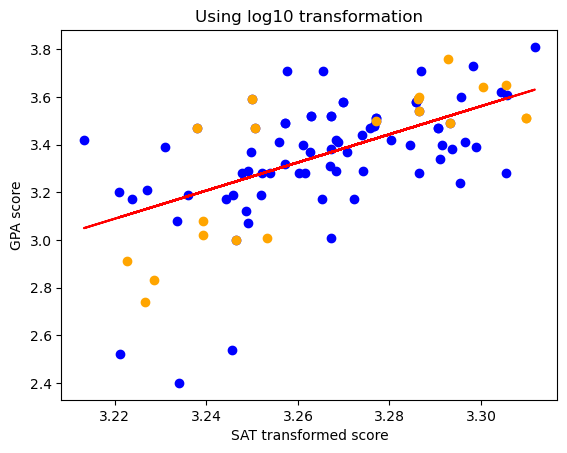

In [14]:
plot_model_use_coeffs_intercept(linear_models[0], 
                                X_train_transformed[0], 
                                y_train, 
                                X_test_transformed[0], 
                                y_test, 
                                xlabel='SAT transformed score', 
                                ylabel='GPA score', 
                                title='Using log10 transformation')

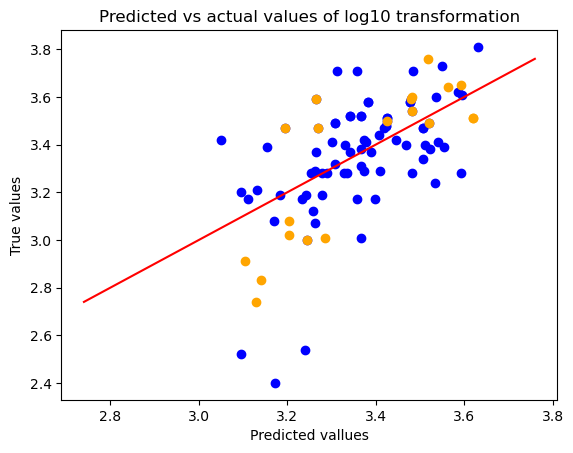

In [15]:
plot_model_use_pred_and_actual_values(y_train, y_train_preds[0], y_test, y_test_preds[0],
                                      title="Predicted vs actual values of log10 transformation")

In [16]:
print('The MSE of the model with log10 transformation is: ', mean_squared_error(y_test, y_test_preds[0]))
print('The MAE of the model with log10 transformation is: ', mean_absolute_error(y_test, y_test_preds[0]))
print('The RMSE of the model with log10 transformation is: ', root_mean_squared_error(y_test, y_test_preds[0]))

The MSE of the model with log10 transformation is:  0.04089506326760839
The MAE of the model with log10 transformation is:  0.17526019698840112
The RMSE of the model with log10 transformation is:  0.20222527850792638


Now plot the results of the standard transformation

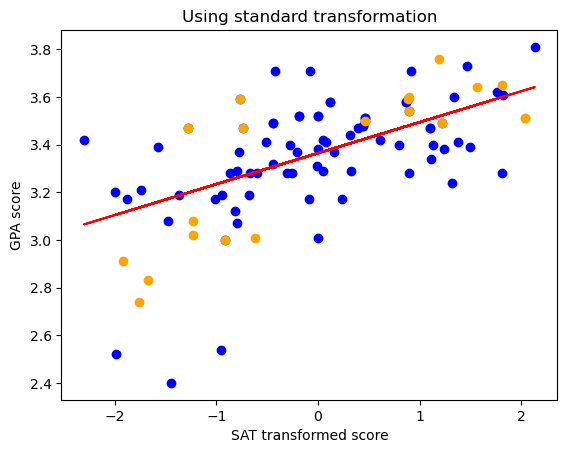

In [17]:
plot_model_use_coeffs_intercept(linear_models[1],
                                X_train_transformed[1], 
                                y_train, 
                                X_test_transformed[1], 
                                y_test, 
                                xlabel='SAT transformed score', 
                                ylabel='GPA score', 
                                title='Using standard transformation')

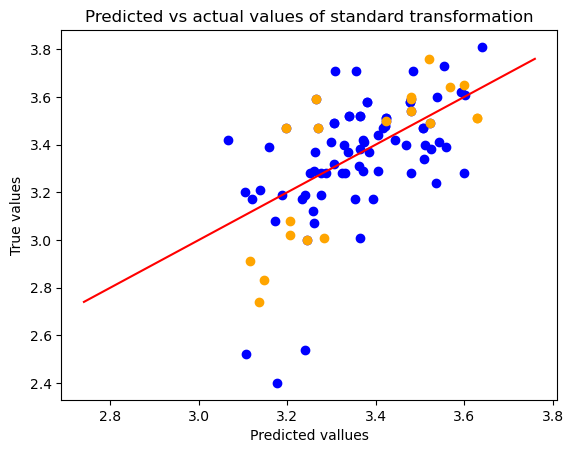

In [18]:
plot_model_use_pred_and_actual_values(y_train, y_train_preds[1], y_test, y_test_preds[1],
                                      title="Predicted vs actual values of standard transformation")

In [19]:
print('The MSE of the model with stadard transformation is: ', mean_squared_error(y_test, y_test_preds[1]))
print('The MAE of the model with standard transformation is: ', mean_absolute_error(y_test, y_test_preds[1]))
print('The RMSE of the model with standard transformation is: ', root_mean_squared_error(y_test, y_test_preds[1]))

The MSE of the model with stadard transformation is:  0.04175152010480847
The MAE of the model with standard transformation is:  0.17717074488908166
The RMSE of the model with standard transformation is:  0.20433188714639833


And last but not leat, the min max transformation

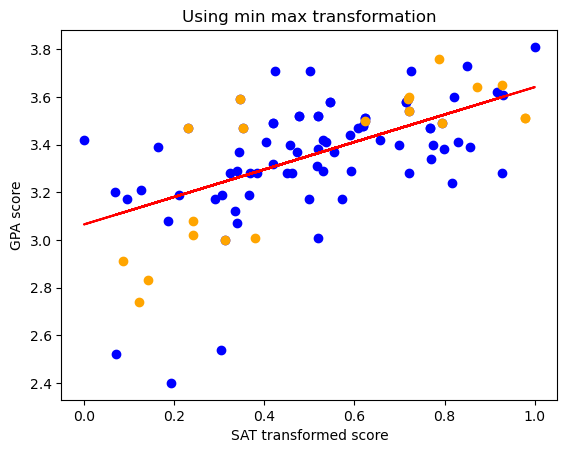

In [20]:
plot_model_use_coeffs_intercept(linear_models[2], 
                                X_train_transformed[2], 
                                y_train, 
                                X_test_transformed[2], 
                                y_test, 
                                xlabel='SAT transformed score', 
                                ylabel='GPA score', 
                                title='Using min max transformation')

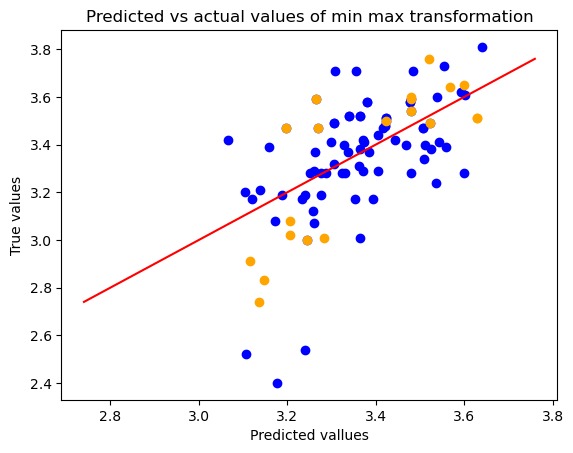

In [21]:
plot_model_use_pred_and_actual_values(y_train, y_train_preds[2], y_test, y_test_preds[2],
                                      title="Predicted vs actual values of min max transformation")

In [22]:
print('The MSE of the model with min max transformation is: ', mean_squared_error(y_test, y_test_preds[2]))
print('The MAE of the model with min max transformation is: ', mean_absolute_error(y_test, y_test_preds[2]))
print('The RMSE of the model with min max transformation is: ', root_mean_squared_error(y_test, y_test_preds[2]))

The MSE of the model with min max transformation is:  0.041751520104808454
The MAE of the model with min max transformation is:  0.17717074488908174
The RMSE of the model with min max transformation is:  0.2043318871463983


Hmm, seem likes the scaling methods we talked about earlier does not make the model better. But this is just a simple example, and in the next example, the effects of the scaling methods will be clearer.

# Second example